**Autor** : Hader Aguiar Dias Azzini

**e-mail**: hader.azzini@semantix.com.br

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

Este notebook tem o objetivo de exemplificar o uso de o pacote **Scikit-learn** no que se refere a **Classificação**

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Questão 1 - Executar o exemplo de Decision Tree](#secao_0)
* [Questão 2 - Executar o exemplo de K Nearst Neighbors](#secao_1)
* [Questão 3 - Executar o exemplo de Support Vector Machine](#secao_2)
* [Conclusão](#conclusao)

#  <a name="secao_0"> Questão 1 - Executar o exemplo de Decision Tree para o dataset Iris </a>
[Voltar ao índice](#indice)

Ref: https://scikit-learn.org/stable/modules/tree.html#classification

In [2]:
# Exemplo de modelo simples de uma árvore de decisão sobre conjunto de dados Iris de Fisher 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

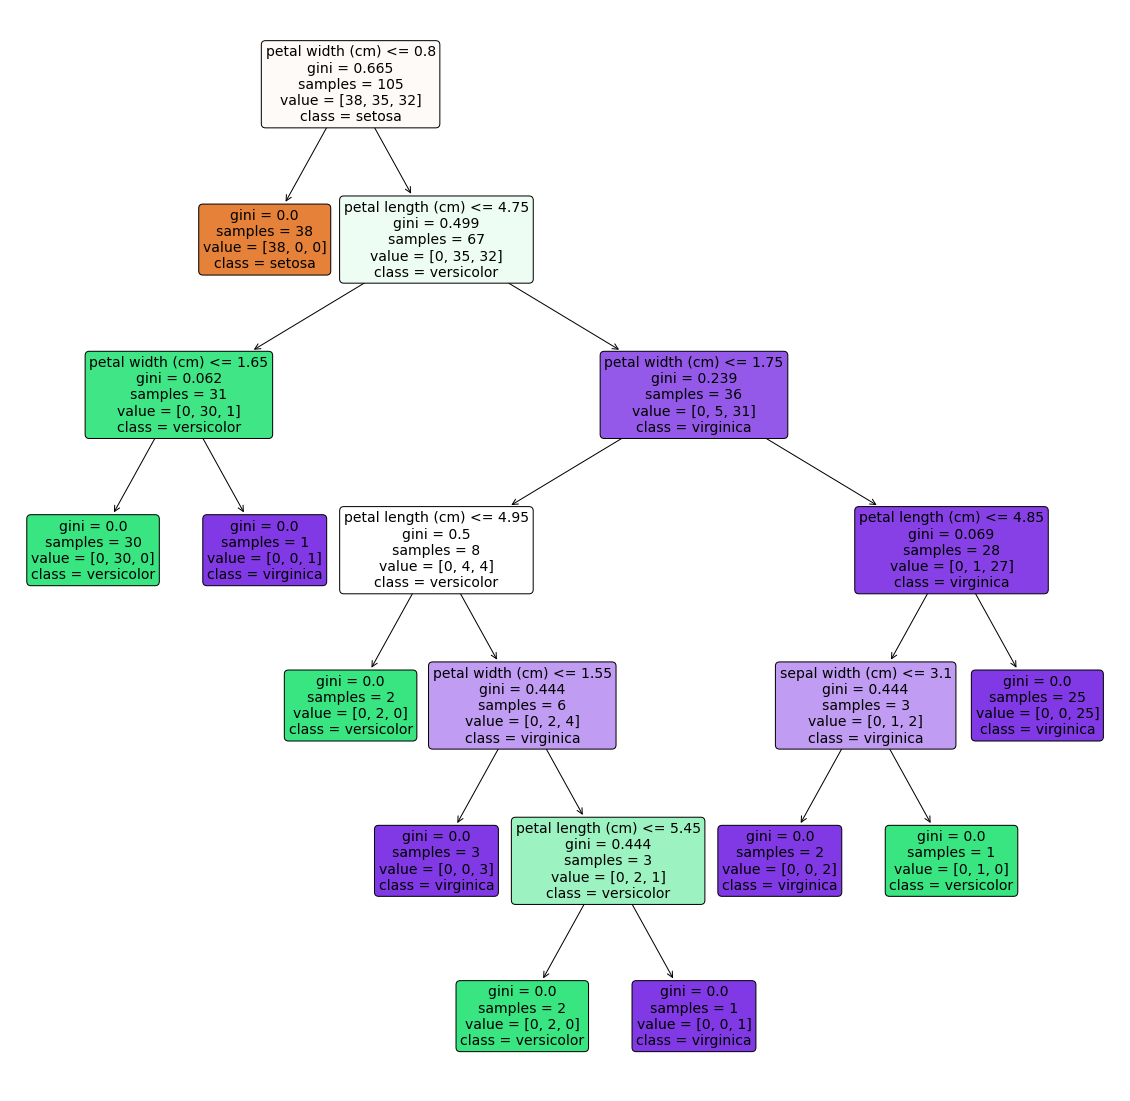

In [3]:
# Graficar árvore de decisão do algoritmo
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=iris.feature_names, 
               class_names=iris.target_names, filled=True, rounded=True, fontsize=14);

In [4]:
# Ver estrutura como texto
r = tree.export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal le

In [5]:
# Medir a performance do modelo de Decision Tree
from sklearn.metrics import accuracy_score, classification_report
pred = clf.predict(X_test)
print("Índice de exatidão: {0:.2f}\n".format(accuracy_score(y_test, pred)))
print("-----------------------------------------")
print("Tabela de métricas de classificação (classification report):\n")
print(classification_report(y_test, pred, digits=3))

Índice de exatidão: 1.00

-----------------------------------------
Tabela de métricas de classificação (classification report):

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        18

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



#  <a name="secao_1"> Questão 2 - Executar o exemplo de K Nearst Neighbors </a>
[Voltar ao índice](#indice)

Ref: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

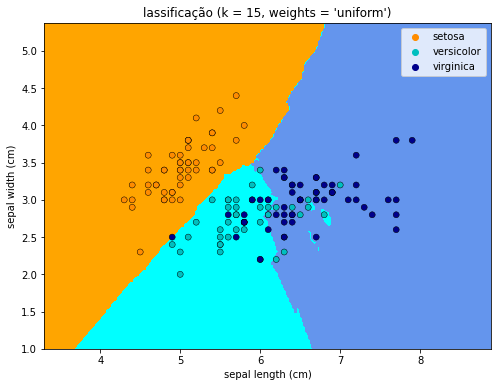

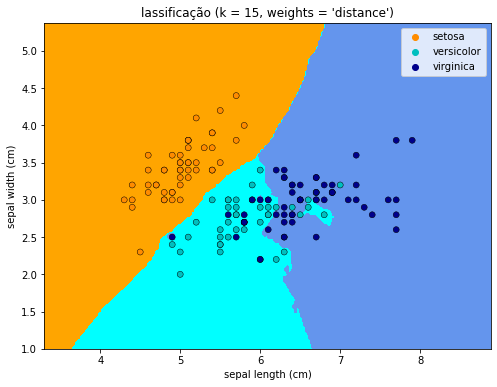

In [6]:
# Exemplo de modelo simples de um k-Vizinhos mais próximos (KNN) sobre conjunto de dados Iris de Fisher com K = 15
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = .02

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Graficar fronteiras de decisão
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Graficar os pontos
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("lassificação (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

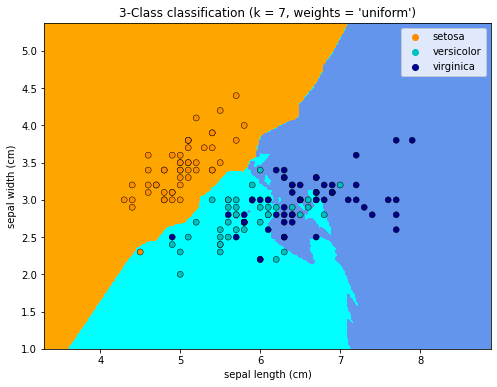

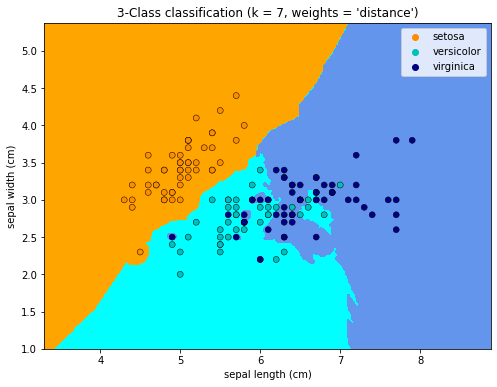

In [7]:
# Exemplo de modelo simples de um k-Vizinhos mais próximos (KNN) sobre conjunto de dados Iris de Fisher com K = 7

n_neighbors = 7
X = iris.data[:, :2]
y = iris.target
h = .02
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

Agora testar a performance do modelo de KNN

In [16]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Índice de exatidão: {0:.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, digits=3))

Índice de exatidão: 0.96
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.917     0.917     0.917        12
           2      0.929     0.929     0.929        14

    accuracy                          0.956        45
   macro avg      0.948     0.948     0.948        45
weighted avg      0.956     0.956     0.956        45



#  <a name="secao_2"> Questão 3 - Executar o exemplo de Support Vector Machine </a>
[Voltar ao índice](#indice)

Ref: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

Ref: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py

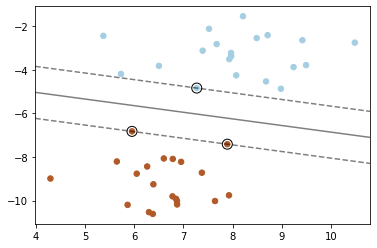

In [12]:
# Exemplo de modelo simples de um Support Vector Machines (SVC) sobre conjunto de dados Iris de Fisher
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# gerar blobs Gaussianos isotrópicos para clustering
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Treinar modelo
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Ilustrar mediante gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Graficar função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Criar rede para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficar as fronteiras
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Graficar vetores de suporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

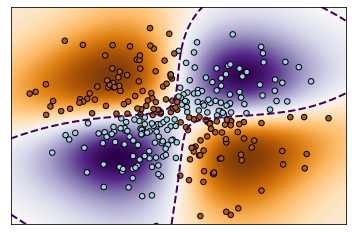

In [13]:
# Exemplo de modelo simples de um Nu-Support Vector Machines (NuSVC) sobre conjunto de dados Iris de Fisher
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Treinamento
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# Graficar as fronteiras de decisão para cada ponto na rede
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Agora testar a performance dos modelos de SVC

In [14]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
svc = svm.SVC(kernel='linear', C=1000)
nusvc = svm.NuSVC(gamma='auto')
svc.fit(X_train, y_train)
nusvc.fit(X_train, y_train)
pred = svc.predict(X_test)
pred = nusvc.predict(X_test)
print("Índice de exatidão do SVC: {0:.2f}".format(accuracy_score(y_test, pred)))
print("Índice de exatidão do NuSVC: {0:.2f}".format(accuracy_score(y_test, pred)))

Índice de exatidão do SVC: 0.96
Índice de exatidão do NuSVC: 0.96


#  <a name="conclusao"> Conclusão </a>
[Voltar ao índice](#indice)

Vemos que para dados simples, as métricas calculadas para cada um dos modelos são muito similares. Nesse sentido, o investigador deve ter claro as limitações de cada um dos algoritmos de classificação sempre que for trabalhar com um conjunto de dados de muitas observações ou atributos.